In [1]:
import matplotlib.pylab as plt

In [2]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [3]:
import requests
import re
import pandas as pd

In [4]:
t=requests.get("https://gcn.gsfc.nasa.gov/integral_grbs.html").text

In [5]:
ds=[]

for l in re.findall("<tr.*?>(.*?)</tr>", t, re.S):
    #print(l)
    ls = re.findall("<td.*?>(.*?)</td>", l, re.S)
    #print(ls)
    if len(ls)<3: continue
    
    print(ls[3], ls[4], ls[5])

    try:
        ds.append(dict(
            kind=ls[3],
            ra=float(ls[4]), dec=float(ls[5])
        ))
    except: pass
    
ds=pd.DataFrame(ds)

Weak 270.9793 -6.9687
Weak 260.6397 +0.2426
Weak 278.9394 +6.3733
Weak 267.6646 -33.8259
Weak 261.6768 -24.8552
Weak 263.8276 -39.7308
Weak 81.6597 +16.2777
Weak 80.4627 +8.8373
Weak 268.8016 -23.7857
Weak 266.4106 -21.5274
Weak 274.2112 +18.5804
Weak 249.1095 +33.5615
Weak 252.9477 +36.6330
Weak 124.3222 -50.3101
Weak 142.5368 -29.1056
Weak 293.4438 +46.9738
Weak 71.7540 +2.0285
Weak 245.3678 -18.9728
Weak 74.7798 +5.6938
Weak 237.9263 -17.5259
Weak 241.5886 -22.3543
Weak 241.2496 -12.5430
Weak 20.6287 +48.6793
Weak 155.2895 -45.2621
Weak 158.4743 -33.1126
Weak 339.8514 +37.5868
Weak 288.8139 +36.9992
Weak 290.3906 +41.9923
Weak 141.6759 -35.0762
Weak 189.7432 -63.6643
Weak 298.9869 +35.3334
Weak 224.5355 -55.1501
Weak 236.1351 -59.4096
Offline 248.5372 -51.8390
Refine 248.5681 -51.8228
Wakeup 248.6058 -51.8071
Weak 300.7099 +36.4006
Weak 134.3834 -37.5414
Weak 299.3319 +34.8764
Weak 0.1958 +5.9886
Weak 355.2107 +2.8917
Weak 9.6292 +5.4349
Weak 191.6129 +3.7323
Weak 181.4097 +4.0367
W

Weak 282.9146 -6.0189
Weak 165.3147 +40.1795
Weak 68.6381 +2.0758
Weak 78.2464 +12.0286
Weak 266.3034 -27.3467
Weak 272.7182 -14.9137
Weak 269.4112 -26.4754
Weak 217.4784 +17.9269
Weak 159.8019 +75.4029
Weak 14.6155 +34.3340
Weak 338.0286 +62.9626
Weak 85.5240 -70.0163
Weak 84.3522 -74.1610
Weak 309.4273 +46.1554
Weak 193.6124 +7.8456
Offline 177.8216 +78.0256
Weak 177.9036 +78.0007
Weak 293.8261 +26.3084
Offline 270.9033 -16.9508
Refine 270.8858 -16.9710
Weak 258.6600 -24.9027
Weak 269.1998 -28.5874
Offline 83.5248 +22.0874
Wakeup 83.5248 +22.0874
Weak 268.9066 -41.8962
Weak 255.9222 -39.9362
Weak 268.7353 -26.1597
Weak 264.5349 -35.4944
Weak 83.7481 +22.0198
Weak 83.7414 +22.0590
Weak 83.5732 +22.1021
Offline 255.2692 -40.5211
Refine 255.2652 -40.5278
Refine 255.2852 -40.5188
Weak 255.3131 -40.4974
Weak 261.3606 -33.0504
Weak 85.7554 -73.0985
Weak 242.6985 -6.9243
Weak 233.1560 -23.5862
Offline 94.7026 -71.0010
Refine 94.6872 -71.0012
Refine 94.6898 -71.0002
Wakeup 94.7055 -71.0124
W

In [6]:
import astroquery.simbad as simbad
import astropy.coordinates as coord

S = simbad.Simbad()
bright = (lambda x: coord.SkyCoord(x['RA'][0], x['DEC'][0], unit=('hourangle', 'deg')))(S.query_object("Crab"))
bright


<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>

In [7]:
brights=[]

for n in "Crab", "Cyg X-1", "1A 0535+262":
    brights.append(
        (n, 
         (lambda x: coord.SkyCoord(x['RA'][0], x['DEC'][0], unit=('hourangle', 'deg')))(S.query_object(n)))
    )


1 out of 104 in 14.132085117392117 16.132085117392116 in 15 0.9615%
7 out of 104 in 9.7 11.7 in 15 6.731%
22 out of 104 in 4.35 6.35 in 15 21.15%
25 out of 104 in -1 1 in 15 24.04%
>> total 55 out of 104 in 15 52.88%

4 out of 316 in 14.132085117392117 16.132085117392116 in 15 1.266%
7 out of 316 in 9.7 11.7 in 15 2.215%
231 out of 316 in 4.35 6.35 in 15 73.1%
14 out of 316 in -1 1 in 15 4.43%
>> total 256 out of 316 in 15 81.01%

1 out of 101 in 14.132085117392117 16.132085117392116 in 15 0.9901%
13 out of 101 in 9.7 11.7 in 15 12.87%
36 out of 101 in 4.35 6.35 in 15 35.64%
12 out of 101 in -1 1 in 15 11.88%
>> total 62 out of 101 in 15 61.39%



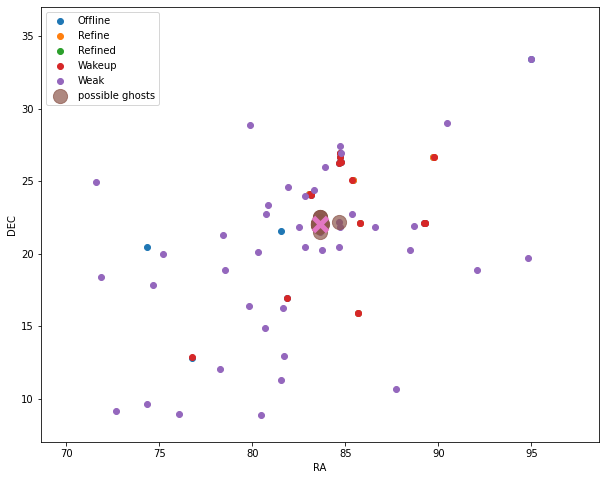

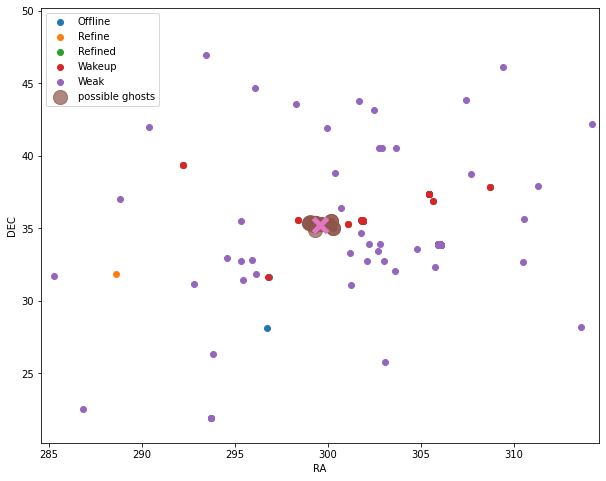

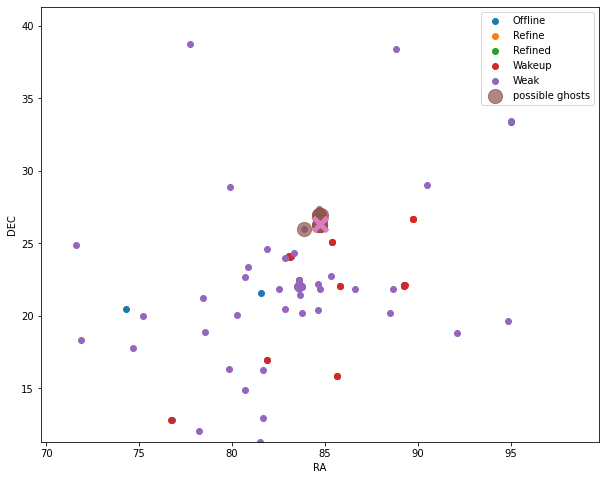

In [8]:

    


zoom = 15

for n, bright in brights:
    plt.figure(figsize=(10,8))
    mG = None
    s = coord.SkyCoord(ds.ra, ds.dec, unit='deg').separation(bright).deg

    for k, g in ds.groupby('kind'):
        plt.scatter(g.ra, g.dec, label=k)

    for ghost_dist in [10.7*2**0.5, 10.7, 10.7/2., 0]:
        mg = (s>ghost_dist-1) & (s<ghost_dist+1)
        print(sum(mg & (s<zoom)), "out of", sum(s<zoom), "in", ghost_dist-1,  ghost_dist+1 , "in", zoom, "%.4g%%"%(100*float(sum(mg & (s<zoom)))/sum(s<zoom)))

        if mG is None:
            mG = mg
        else:
            mG |= mg

    print(">> total", sum(mG & (s < zoom)), "out of", sum(s<zoom),  "in", zoom, 
           "%.4g%%"%(100*float(sum(mG & (s<zoom)))/sum(s<zoom))
         )




    plt.scatter(ds.ra[mg], ds.dec[mg], label='possible ghosts', s=200, alpha=0.7)

    plt.scatter(bright.ra, bright.dec, marker="x", s=200, lw=5)

    plt.xlim([bright.ra.deg-zoom, bright.ra.deg+zoom])
    plt.ylim([bright.dec.deg-zoom, bright.dec.deg+zoom])

    
    plt.legend()

    plt.xlabel("RA")
    plt.ylabel("DEC")
    
    print()
    